In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Fill Nulls

- Significant portion of 'Cabin' fields are empty
- A few 'Age' fields are empty
- 2 'Embarked' fields are empty

In [6]:
# Fill null Age values with '29.5'
train_data.Age.fillna(value=29.5, inplace=True)
train_data.Age.isna().sum()

0

In [7]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
# Fill null Embarked values with 'N'
train_data.Embarked.fillna(value='N', inplace=True)
train_data.Embarked.isna().sum()

0

In [9]:
train_data.drop(columns='Cabin', inplace=True)

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Further Analysis


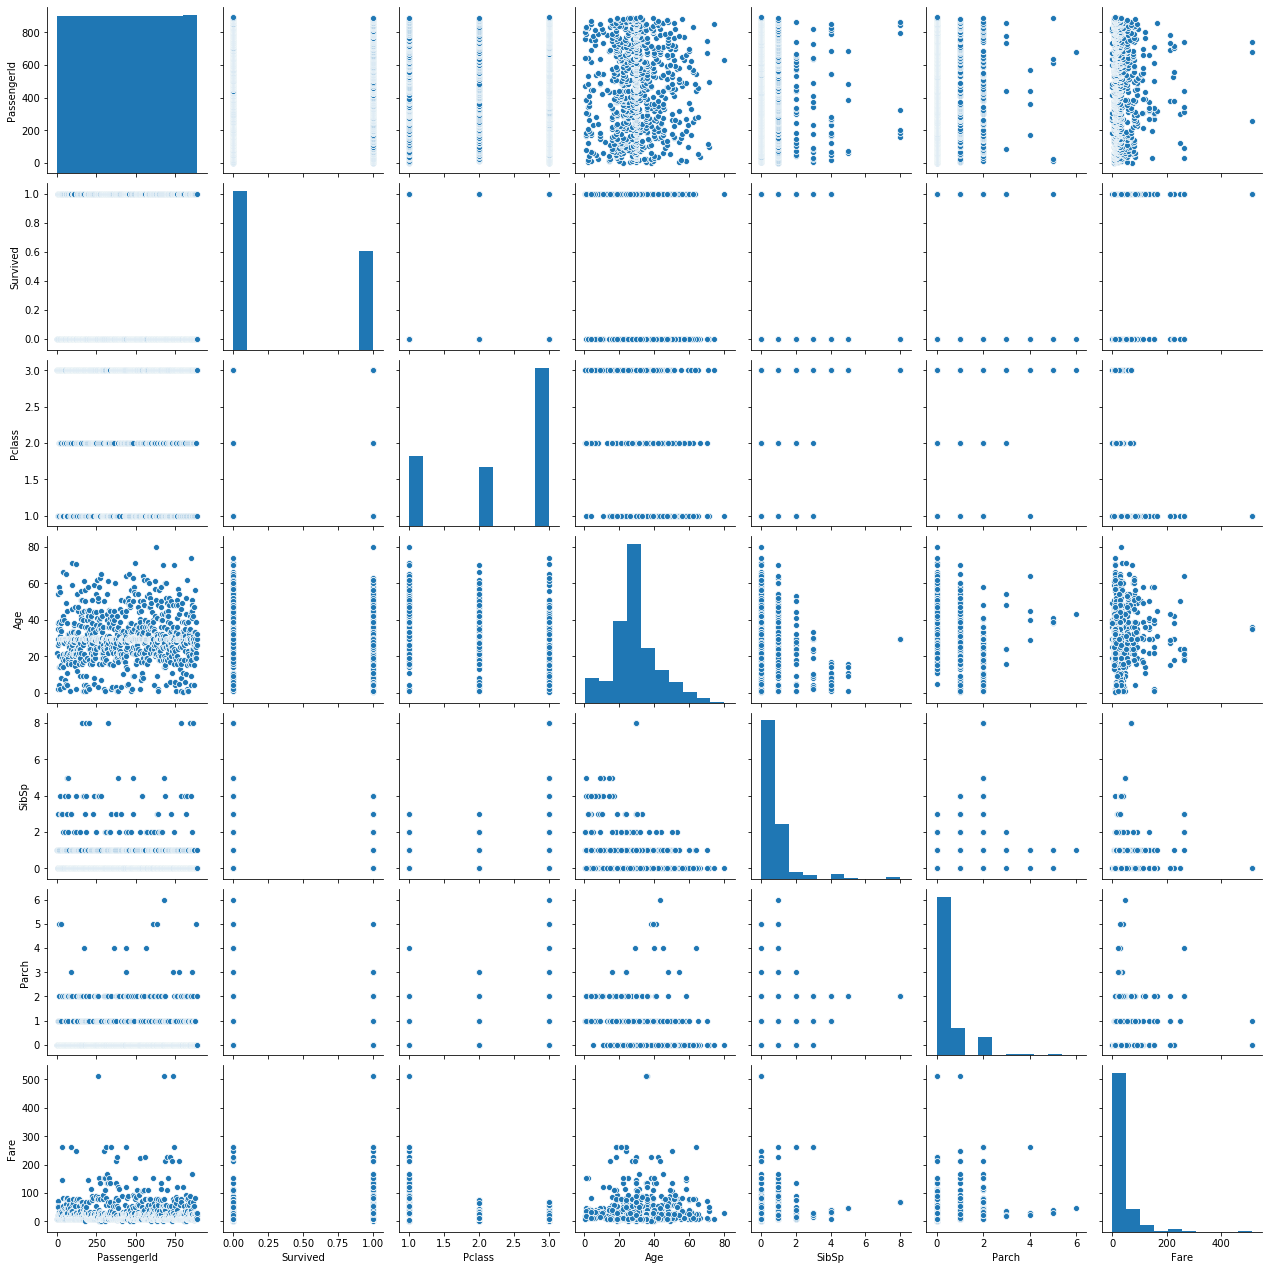

In [11]:
sns.pairplot(train_data)

#### What is?:
- SibSp : # of siblings / spouses aboard the Titanic
- Parch : # of parents / children aboard the Titanic
- Embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#### Look into:
- 3rd class vs. survived
- SibSp vs. Age
- Parch vs. Age
- SibSp vs. PassengerId
- SibSp vs. Parch
- SibSp vs. Fare
- Parch vs. PassengerId
- Parch vs. Fare
- Embarked vs. Various
- 
- Traveling alone?

In [12]:
print('SibSp:')
print(train_data.SibSp.unique())
print('Parch:')
print(train_data.Parch.unique())

SibSp:
[1 0 3 4 2 5 8]
Parch:
[0 1 2 5 3 4 6]


In [13]:
parch_count = train_data.Parch.value_counts()
parch_count

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
survived_df = train_data.groupby('Survived').count()
survived_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342,342,342


In [74]:
parch_count_df = train_data.groupby(['Parch', 'Survived']).count()
parch_count_df

PassengerId  Pclass  Name  Sex  Age  SibSp  Ticket  Fare  \
Parch Survived                                                             
0     0                 445     445   445  445  445    445     445   445   
      1                 233     233   233  233  233    233     233   233   
1     0                  53      53    53   53   53     53      53    53   
      1                  65      65    65   65   65     65      65    65   
2     0                  40      40    40   40   40     40      40    40   
      1                  40      40    40   40   40     40      40    40   
3     0                   2       2     2    2    2      2       2     2   
      1                   3       3     3    3    3      3       3     3   
4     0                   4       4     4    4    4      4       4     4   
5     0                   4       4     4    4    4      4       4     4   
      1                   1       1     1    1    1      1       1     1   
6     0                   1       1     1    1    1      1       1     1   

                Embarked  
Parch Survived            
0     0              445  
      1              233  
1     0               53  
      1               65  
2     0               40  
      1               40  
3     0                2  
      1                3  
4     0                4  
5     0                4  
      1                1  
6     0                1

In [90]:
parch_count_df2 = train_data.groupby(['Survived','Parch']).count()
parch_count_df2

PassengerId  Pclass  Name  Sex  Age  SibSp  Ticket  Fare  \
Survived Parch                                                             
0        0              445     445   445  445  445    445     445   445   
         1               53      53    53   53   53     53      53    53   
         2               40      40    40   40   40     40      40    40   
         3                2       2     2    2    2      2       2     2   
         4                4       4     4    4    4      4       4     4   
         5                4       4     4    4    4      4       4     4   
         6                1       1     1    1    1      1       1     1   
1        0              233     233   233  233  233    233     233   233   
         1               65      65    65   65   65     65      65    65   
         2               40      40    40   40   40     40      40    40   
         3                3       3     3    3    3      3       3     3   
         5                1       1     1    1    1      1       1     1   

                Embarked  
Survived Parch            
0        0           445  
         1            53  
         2            40  
         3             2  
         4             4  
         5             4  
         6             1  
1        0           233  
         1            65  
         2            40  
         3             3  
         5             1

SibSp_count_df = train_data.groupby(['SibSp', 'Survived']).count()
SibSp_count_df

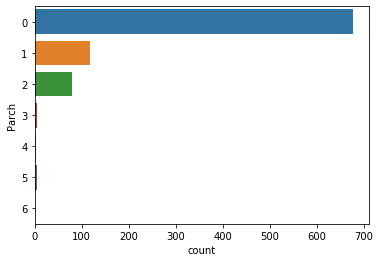

In [94]:
sns.countplot(data=parch_count_df, y=train_data.Parch)

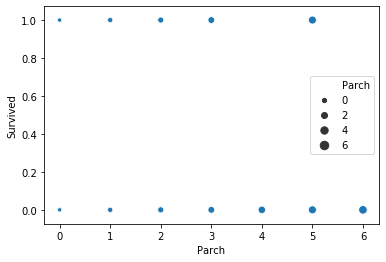

In [89]:
sns.scatterplot(data=train_data,
                x=train_data.Parch,
                y=train_data.Survived,
                size=train_data.Parch)

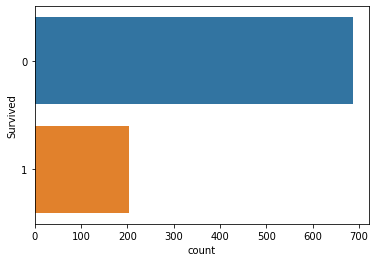

In [45]:
sns.countplot(data=train_data.Survived, y=train_data.Parch)

In [42]:
def parch_count(x):
    parch_count = train_data.Parch.value_counts()
    return parch_count[x]

In [43]:
parch_count(0)

678

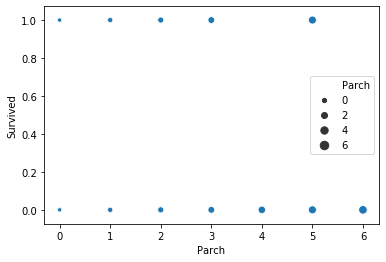

In [19]:
sns.scatterplot(x=train_data.Parch,
                y=train_data.Survived,
                size=train_data.Parch)

https://stackoverflow.com/questions/31460146/plotting-value-counts-in-seaborn-barplot

In [17]:
# Add EmbarkedNum C=1 Q=2 S=3

for x in train_data['Embarked']:
    num_list = []
    print(x)

S
C
S
S
S
Q
S
S
S
C
S
S
S
S
S
S
Q
S
S
C
S
S
Q
S
S
S
C
S
Q
S
C
C
Q
S
C
S
C
S
S
C
S
S
C
C
Q
S
Q
Q
C
S
S
S
C
S
C
S
S
C
S
S
C
N
S
S
C
C
S
S
S
S
S
S
S
C
S
S
S
S
S
S
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
C
C
S
S
S
S
S
S
S
S
S
S
S
Q
S
C
S
S
C
S
Q
S
C
S
S
S
C
S
S
C
Q
S
C
S
C
S
S
S
S
C
S
S
S
C
C
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
C
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
S
Q
S
S
C
S
S
C
S
S
S
C
S
S
S
S
Q
S
Q
S
S
S
S
S
C
C
Q
S
Q
S
S
S
S
C
S
S
S
C
Q
C
S
S
S
S
Q
C
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
Q
S
S
C
Q
S
S
S
S
S
S
S
S
S
C
C
S
C
S
Q
S
S
S
Q
S
S
S
S
S
S
S
S
C
Q
S
S
S
Q
S
Q
S
S
S
S
C
S
S
S
Q
S
C
C
S
S
C
C
S
S
C
Q
Q
S
Q
S
S
C
C
C
C
C
C
S
S
S
S
S
S
S
C
S
S
Q
S
S
C
S
S
S
C
Q
S
S
S
S
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
S
C
S
S
S
Q
Q
S
C
C
S
Q
S
C
C
Q
C
C
S
S
C
S
C
S
C
C
S
C
C
S
S
S
S
S
S
Q
C
S
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
Q
Q
S
S
S
S
S
S
S
C
Q
S
S
S
S
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
S
S
S
C
C
S
C
S
S
S
Q
S
S
S
S
S
S
S
S
Q
C
S
S
S
C
S
S
S
S
S
S
S
S
S
S
C
S
S
C
S
S
S
S
S
C
S
C
C
S
S
S


In [18]:
for x in train_data['Embarked']:
    num_list = []
    if x is "C":
        print(x)

C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C
C


In [19]:
for x in train_data['Embarked']:
    num_list = []
    if x is "C":
        print(1)
    elif x is "Q":
        print(2)
    elif x is "S":
        print(3)
    else:
        print(0)

3
1
3
3
3
2
3
3
3
1
3
3
3
3
3
3
2
3
3
1
3
3
2
3
3
3
1
3
2
3
1
1
2
3
1
3
1
3
3
1
3
3
1
1
2
3
2
2
1
3
3
3
1
3
1
3
3
1
3
3
1
0
3
3
1
1
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
1
1
3
3
3
3
3
3
3
3
3
3
3
2
3
1
3
3
1
3
2
3
1
3
3
3
1
3
3
1
2
3
1
3
1
3
3
3
3
1
3
3
3
1
1
3
3
2
3
3
3
3
3
3
3
3
3
3
3
1
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
1
3
3
1
3
3
3
1
3
3
3
3
2
3
2
3
3
3
3
3
1
1
2
3
2
3
3
3
3
1
3
3
3
1
2
1
3
3
3
3
2
1
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
2
3
3
1
2
3
3
3
3
3
3
3
3
3
1
1
3
1
3
2
3
3
3
2
3
3
3
3
3
3
3
3
1
2
3
3
3
2
3
2
3
3
3
3
1
3
3
3
2
3
1
1
3
3
1
1
3
3
1
2
2
3
2
3
3
1
1
1
1
1
1
3
3
3
3
3
3
3
1
3
3
2
3
3
1
3
3
3
1
2
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
1
3
3
3
2
2
3
1
1
3
2
3
1
1
2
1
1
3
3
1
3
1
3
1
1
3
1
1
3
3
3
3
3
3
2
1
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
3
3
3
3
3
1
2
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
1
1
3
1
3
3
3
2
3
3
3
3
3
3
3
3
2
1
3
3
3
1
3
3
3
3
3
3
3
3
3
3
1
3
3
1
3
3
3
3
3
1
3
1
1
3
3
3
